<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('sat_scores.csv', mode='r') as file:
    reader = csv.reader(file)
    sat_list = list(reader)

sat_dict ={'State':[],'Rate':[],'Verbal':[],'Math':[]}
    
for col in sat_list[1:]:
    sat_dict['State'].append(col[0])
    sat_dict['Rate'].append(col[1])
    sat_dict['Verbal'].append(col[2])
    sat_dict['Math'].append(col[3])   
sat_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
sat_score_fromdict = pd.DataFrame(sat_dict)
sat_score_fromdict.head()

sat_score_fromdict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [4]:
#pandas csv approach

sat_scores_csv = 'sat_scores.csv'
sat_scores = pd.read_csv(sat_scores_csv)

sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

For dataframe converted from dict, the numeric columns are objects (strings) instead of integer 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [8]:
# State: Represents the different states in US  (string)
# Rate: the participation rate in SAT exams per state (integer)
# Verbal: average points scored for combined reading and writing sections (integer)
# Math: average points scored for mathematical sections (integer)

# 52 rows by 4 columns


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

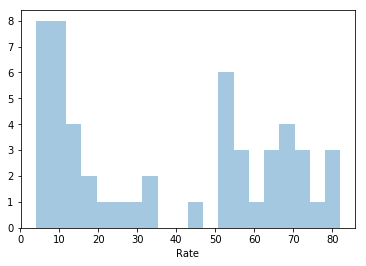

In [9]:
import seaborn as sns

rate = sat_scores['Rate']
math = sat_scores['Math']
verbal = sat_scores['Verbal']

sns.distplot(rate, kde = False, bins = 20)

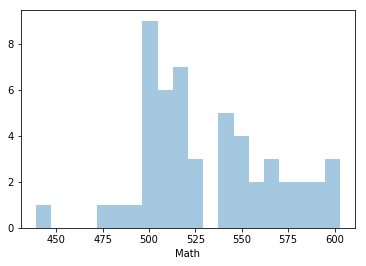

In [10]:
sns.distplot(math, kde = False, bins = 20)

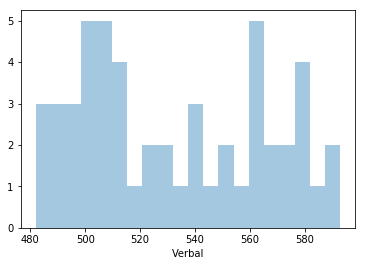

In [11]:
sns.distplot(verbal, kde = False, bins = 20)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<Figure size 1440x720 with 0 Axes>

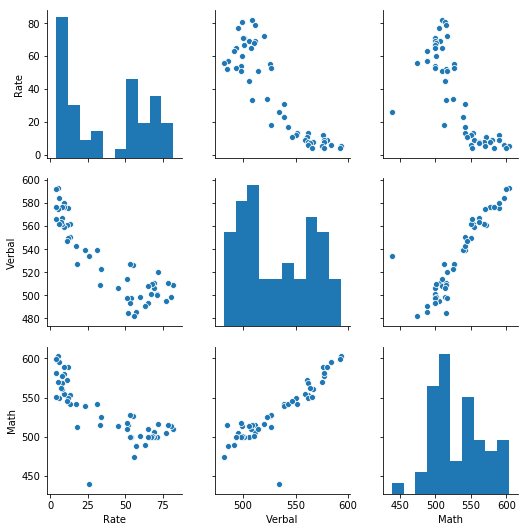

In [12]:
plt.figure(figsize=(20,10))
sns.pairplot(sat_scores)

#Higher verbal scores are associated with higher math scores, vice versa

#It seems like there's a strong inverse relationship between Participation rate and Verbal scores
#and slight inverse r/s betweeen Participation rate and Math Scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

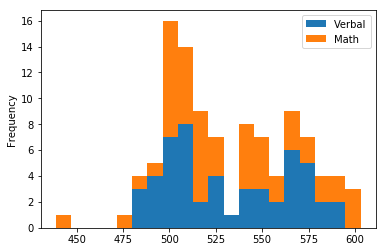

In [13]:
sat_scores[['Verbal','Math']].plot.hist(stacked = True, bins = 20)

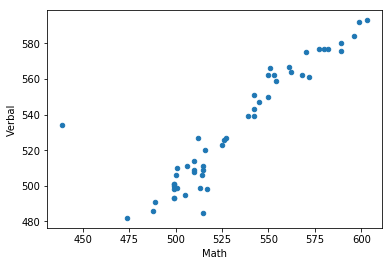

In [14]:
sat_scores.plot.scatter(x='Math',y='Verbal' )

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

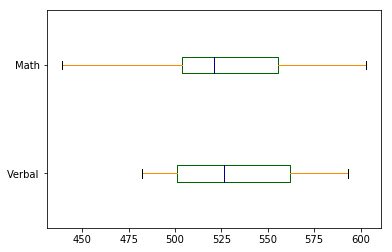

In [16]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue'}

sat_scores[['Verbal','Math']].plot.box(color = color, vert = False)


#We can better see and identify our data's skewness and symmetry in a boxplot as compared to a histogram. Scatterplots 
#informs us on the relationship between 2 variables, but does not tell us much on the variable's individual characteristics.

#Rate has a lower scale of 0-100 and it's not appropriate to represent in the same chart.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


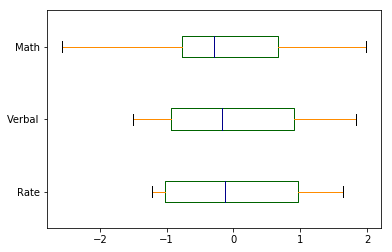

In [17]:
sat_stand = sat_scores.drop(["State"],axis = 1)

sat_scores_standardized = (sat_stand - sat_stand.mean())/sat_stand.std()


color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue'}
sat_scores_standardized.plot.box(color = color, vert = False)


#By normalizing all the variables, we can better appreciate the distribution of every variable on the same scale.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices [DEPRECATED!]
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
sat_scores['Verbal'].mean()

532.0192307692307

In [19]:
sat_scores.shape

(52, 4)

In [20]:
verb_abv_avg = list(sat_scores["State"].loc[sat_scores['Verbal'] > sat_scores['Verbal'].mean()])
len(verb_abv_avg)


#24 states above mean. Considering there's 52 states in total, Verbal scores seems to be quite evenly distributed 


24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
verb_abv_med = list(sat_scores["State"].loc[sat_scores['Verbal'] > sat_scores['Verbal'].median()])
len(verb_abv_med)

#26 states above median. With 2 more states above median compared to mean, it indicates that mean > median. 
#This is the the case as Verbal is right/positively skewed. 

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
sat_scores["Verbal - Math"] = sat_scores['Verbal'] - sat_scores["Math"]
sat_scores["Verbal - Math"].sort_values()

21   -30
23   -19
1    -14
33   -13
44   -12
36   -11
3    -10
47   -10
37    -9
51    -8
49    -7
40    -6
20    -6
25    -6
12    -6
48    -5
2     -4
38    -3
26    -3
14    -2
15    -2
11    -2
24    -2
0     -1
18    -1
17     0
19     0
28     0
34     0
42     0
30     1
6      1
5      2
13     2
43     2
35     2
10     2
22     4
4      4
46     5
7      5
39     5
41     6
8      6
16     8
9      9
31     9
32     9
45    12
29    15
50    15
27    95
Name: Verbal - Math, dtype: int64

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
verbal_greater_math = sat_scores.loc[:,["State","Verbal - Math"]]
verbal_greater_math.sort_values(by = "Verbal - Math", ascending = False, inplace = True)
verbal_greater_math = verbal_greater_math.head(10)

verbal_greater_math.reset_index(drop = True, inplace = True)
verbal_greater_math.index += 1

verbal_greater_math.head(3)

,State,Verbal - Math
1,OH,95
2,MS,15
3,WV,15


In [24]:
sat_scores['Math - Verbal'] = sat_scores['Math'] - sat_scores["Verbal"]
math_greater_verbal = sat_scores.loc[:,["State",'Math - Verbal']]
math_greater_verbal.sort_values(by = 'Math - Verbal', ascending = False, inplace = True)
math_greater_verbal = math_greater_verbal.head(10)

math_greater_verbal.reset_index(drop = True, inplace = True)
math_greater_verbal.index += 1

math_greater_verbal.head(3)

,State,Math - Verbal
1,HI,30
2,CA,19
3,NJ,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [25]:
no_state = sat_scores.drop("State", axis = 1)
no_state
no_state.corr()

#There's a strong correlation between Verbal and Math scores - which goes to show that states who do well in one subject
#will most likely do well in the other, vice versa. 

,Rate,Verbal,Math,Verbal - Math,Math - Verbal
Rate,1.000000,-0.886432,-0.773746,-0.101412,0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600,-0.052600
Math,-0.773746,0.899871,1.000000,-0.388219,0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000,-1.000000
Math - Verbal,0.101412,-0.052600,0.388219,-1.000000,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [26]:
sat_scores.describe()

#count tells us the number of observations in each variable/column
#mean tells us the average value of the values in the column
#std tells us the standard deviation of the variable
#min tells us the lowest value observed 
#25% tells us the 25th percentile value in the variable
#50% tells us the 50th percentile value in the variable aka Median
#75% tells us the 75th percentile value in the variable
#max tells us the highest value observed 

,Rate,Verbal,Math,Verbal - Math,Math - Verbal
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231,-0.519231
std,27.301788,33.236225,36.014975,15.729939,15.729939
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,504.000000,-6.000000,-4.250000
50%,33.500000,526.500000,521.000000,0.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [28]:
no_state.cov()

#covariance measures the relatedness between 2 variables: positive indicating they move in same direction, 
#while negative, opposite direction.

#corr = COVxy/(Std(x)*Std(y))

#covariance units comprise of X and Y's units. Therefore, it's not very instructive on the strength of relationship 
#between 2 variables. Correlation has no units and from a scale of -1 to 1, tell us the type and strength of r/s
#between 2 variables. 

,Rate,Verbal,Math,Verbal - Math,Math - Verbal
Rate,745.387632,-804.355958,-760.803922,-43.552036,43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623,-27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373,219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995,-247.430995
Math - Verbal,43.552036,-27.499623,219.931373,-247.430995,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [29]:
drug_use_csv = 'drug-use-by-age.csv'

drug_use = pd.read_csv(drug_use_csv)

drug_use.replace('-',np.nan, inplace = True)
#use: Percentage of those in an age (group) who used said substance in the past 12 months
#frequency: Median number of times a user in an age group used (Substance) in the past 12 months

In [30]:
for i in drug_use.columns:                  
    try:
        drug_use[i] = drug_use[i].astype(float)   #convert all numbers related columns to float
    except: 
        i = i 
drug_use.dtypes

age                         object
n                          float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [31]:
print(drug_use.isnull().sum().sum())  #Some substances frequency values (9 in total) are missing and seems to be 
#missing NOT AT RANDOM on the surface. 

#Since those NaN values of a substance's frequency are have usage patterns that are zero, it is safe for us to assume
#that the frequency is zero as well. 

drug_use.fillna(0, inplace = True)

9


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [ ]:
drug_use

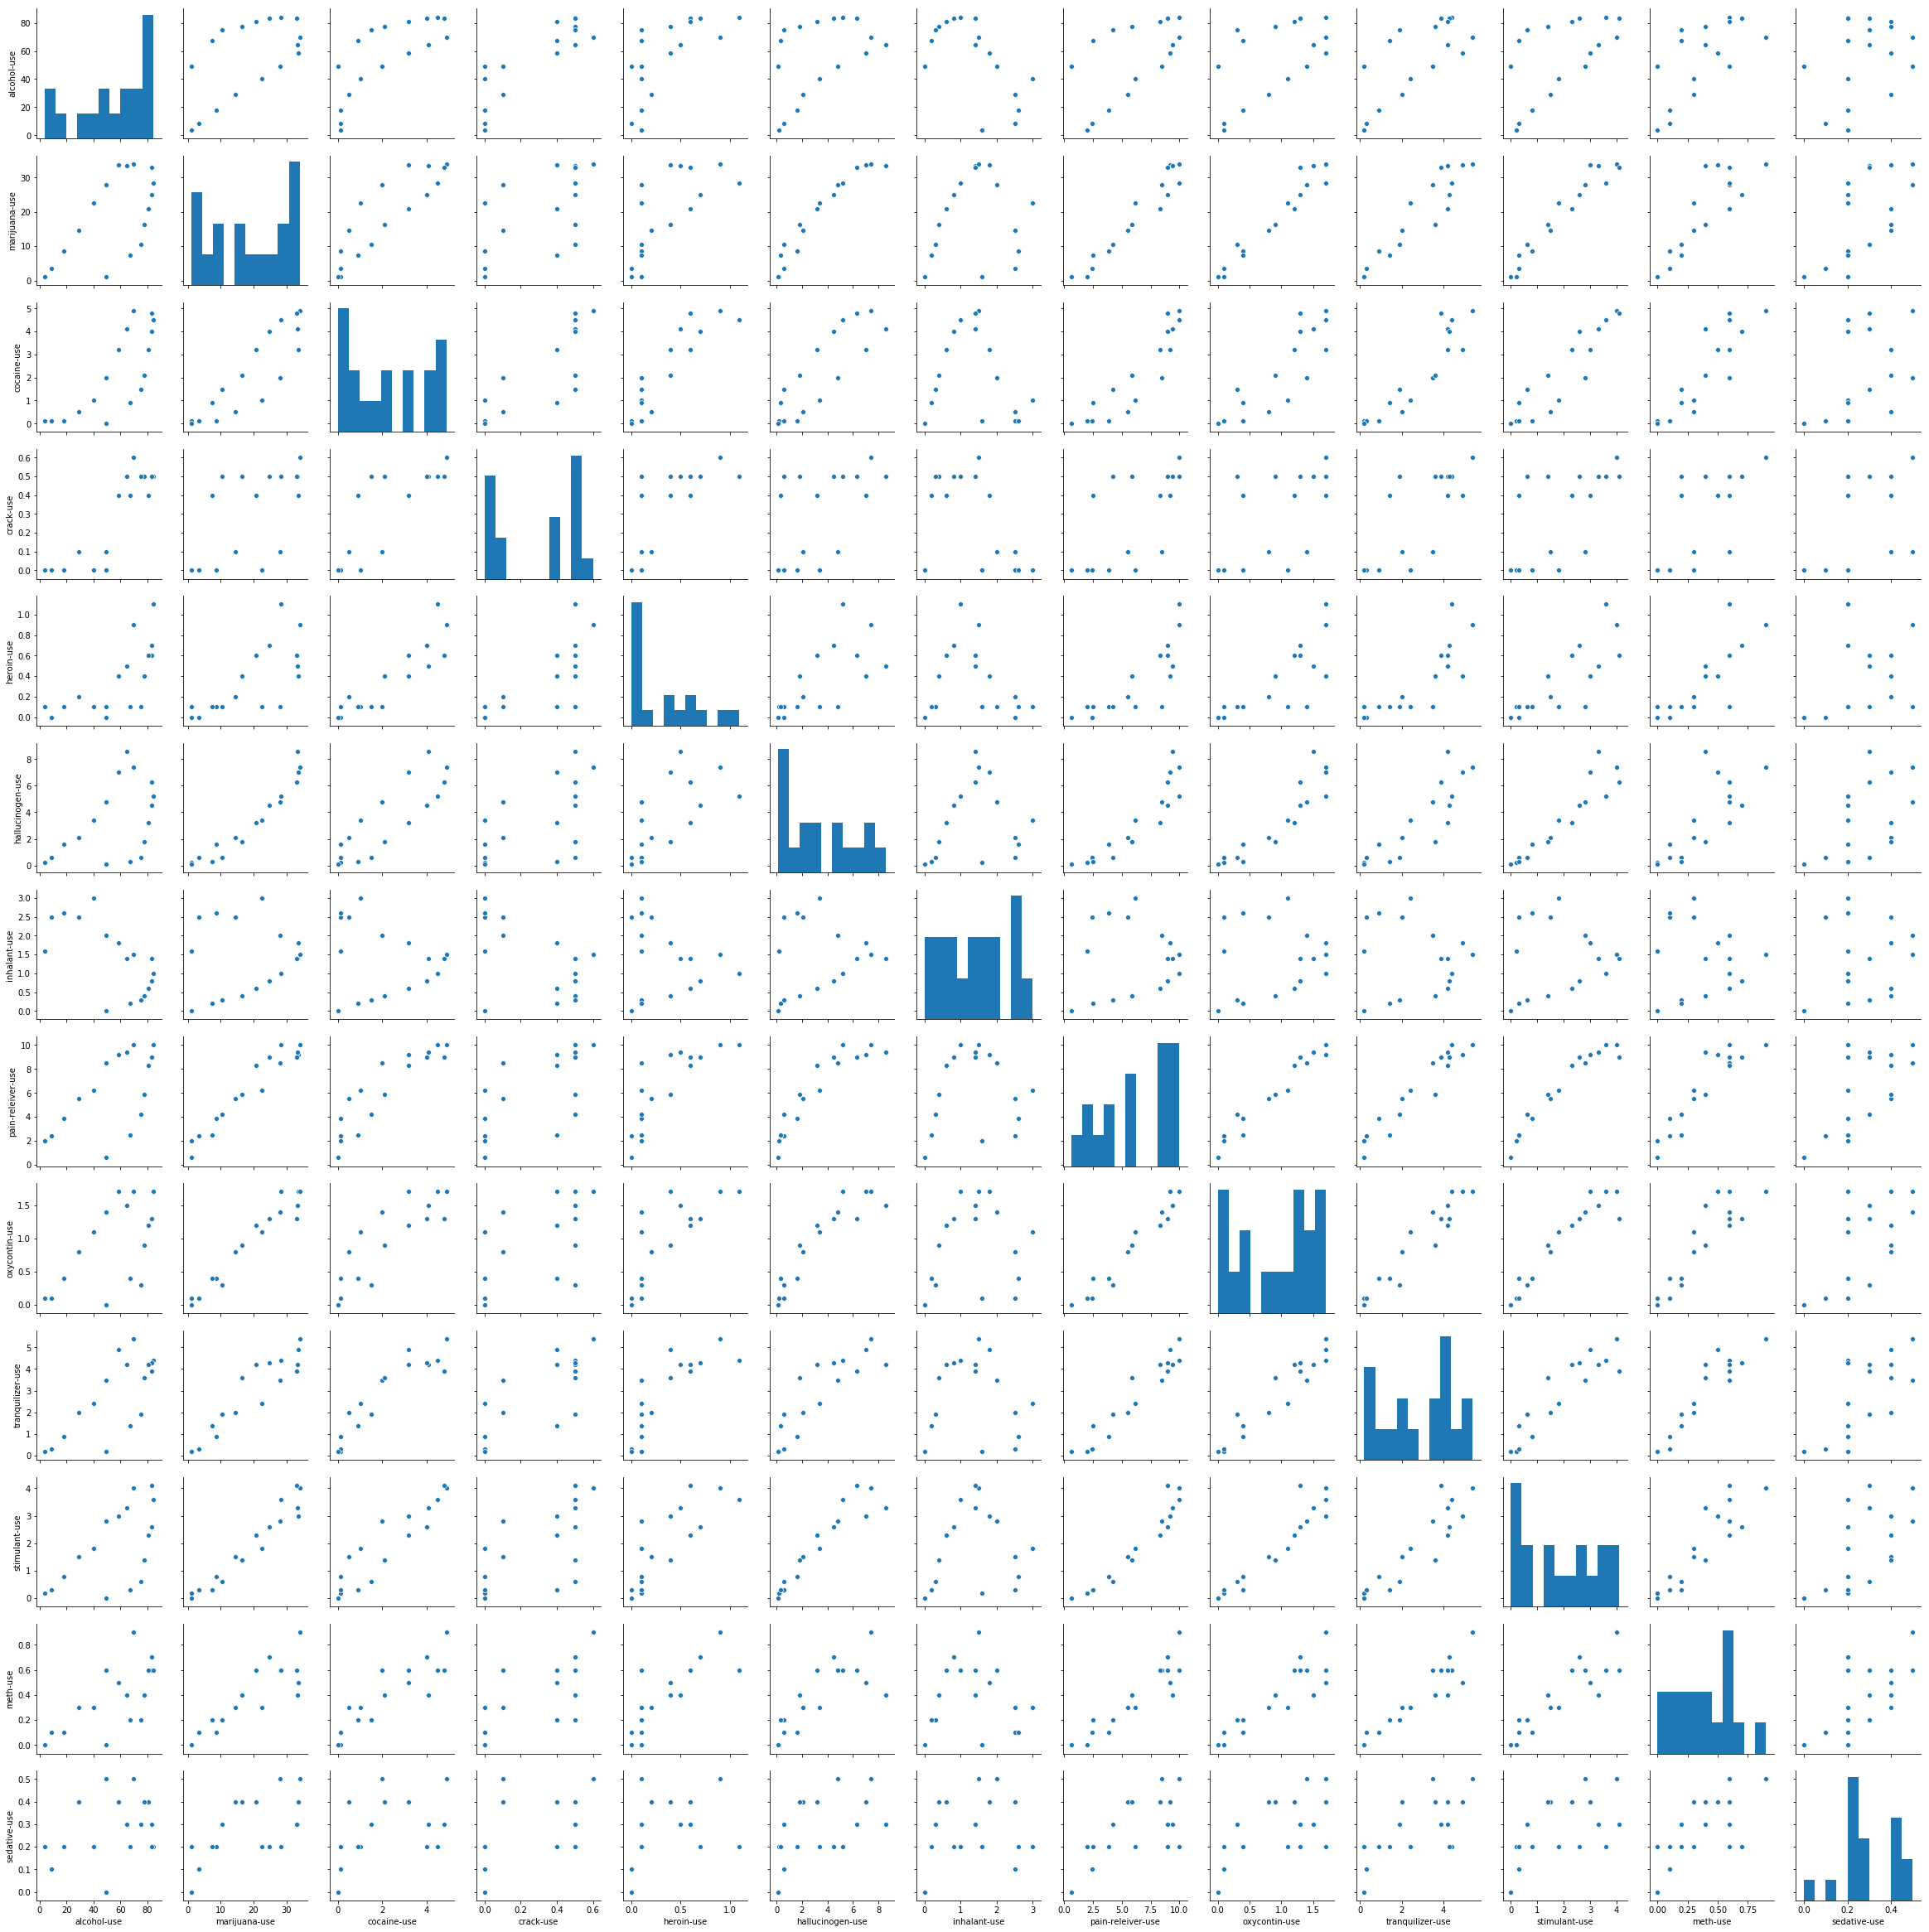

In [32]:
#filtered out a subset of dataframe with just drug 'use' columns
percentage_drug_use = drug_use.filter(regex = 'use$',axis =1)  
sns.pairplot(percentage_drug_use)

#Looking at the pairplots, seems like there is a direct correlation between drugs usage, meaning if usage of alcohol is high,
#liklihood of other drugs usage would be high too

#let's plot the correlations out on a heatmap to see more clearly how 'correlated' they really are.

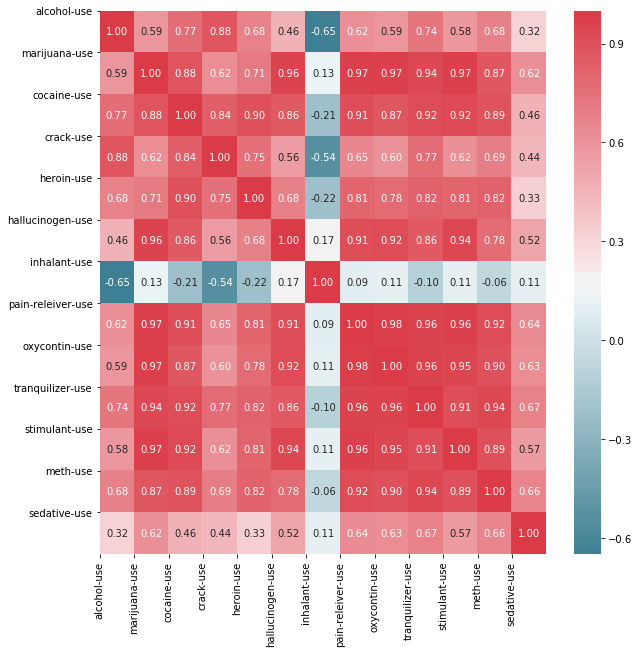

In [33]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    
heatMap(percentage_drug_use)

#in general, most drugs usage have a positive correlation with others, with marijuana, cocaine, pain-reliever, oxycotin,
#tranquilizers having stronger relationships. Sedative and alcohol usage are also positively correlated with others, albeit
#having a relatively weaker relationship.

#Also, it is clear that inhalant usage is not correlated or even negatively correlated on some instances with other drugs
#usages.

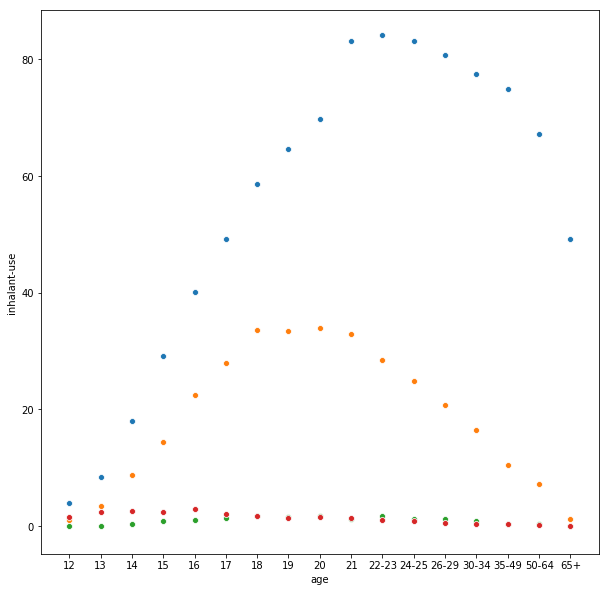

In [34]:
fig,ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot(x=drug_use['age'], y= drug_use['alcohol-use'])
ax = sns.scatterplot(x=drug_use['age'], y= drug_use['marijuana-use'])
ax = sns.scatterplot(x=drug_use['age'], y= drug_use['oxycontin-use'])
ax = sns.scatterplot(x=drug_use['age'], y= drug_use['inhalant-use'])

plt.ylabel = "drug_usage"

plt.show()

#for some drugs usage patterns changes with age and peaks around early 20s, while for others like oxycontin and inhalant
#usage seems to be consistent across age groups.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
Main objective here is to see how we can reduce drug usage. Thus, it's helpful to answer some questions here:

**-Which drug are among the most commonly abused?
-Which drugs are among the most heavily abused?
-Which age group are the 'biggest' users of drugs?**
...

In [35]:
# Code
percentage_drug_use['Usage Summed'] = percentage_drug_use.sum(axis=1)

pd.concat([drug_use['age'], percentage_drug_use], axis =1)

C:\Users\Jit Nung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,Usage Summed
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,9.7
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,18.4
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,37.5
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,59.6
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,82.1
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5,103.6
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4,124.9
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3,132.2
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5,141.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3,149.0


In [36]:
#usage based on age groups
percentage_drug_use['Usage Summed'].sort_values(ascending = False)

9     149.0
10    145.4
8     141.5
11    136.6
7     132.2
12    126.5
6     124.9
13    111.7
5     103.6
14     95.9
4      82.1
15     81.4
3      59.6
16     51.4
2      37.5
1      18.4
0       9.7
Name: Usage Summed, dtype: float64

In [37]:
#total drug usage based on drug type - tells us how widespread is the usage of a certain drug.
percentage_drug_use.sum().sort_values(ascending = False)

Usage Summed         1607.4
alcohol-use           942.3
marijuana-use         321.7
pain-releiver-use     106.6
hallucinogen-use       57.7
tranquilizer-use       47.7
cocaine-use            37.0
stimulant-use          32.6
inhalant-use           23.6
oxycontin-use          15.9
meth-use                6.5
heroin-use              6.0
crack-use               5.0
sedative-use            4.8
dtype: float64

In [38]:
#frequency of drugs used - proxied by median times people used a particular drug in a year

percentage_drug_freq = drug_use.filter(regex = 'frequency$',axis =1)  
pd.concat([drug_use['age'], percentage_drug_freq], axis =1)

percentage_drug_freq.sum().sort_values(ascending = False)

heroin-frequency           1172.5
marijuana-frequency         730.0
alcohol-frequency           567.0
meth-frequency              539.5
stimulant-frequency         529.5
sedative-frequency          329.5
pain-releiver-frequency     250.0
oxycontin-frequency         237.0
crack-frequency             210.5
tranquilizer-frequency      199.5
hallucinogen-frequency      143.0
cocaine-frequency           126.0
inhalant-frequency           98.5
dtype: float64

**Report**

Finding 1: 
The 21 year olds are the biggest overall drug users, and the 20-23 year olds are top 3 abusers based on usage patterns. 

Finding 2:
Most popular drug is alcohol, followed by marijuana and pain relievers, with high proportion of people partaking across
all age groups.

Finding 3:
Most heavily used (or abused) drug is heroin, followed by marijuana and alochol. 
...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [50]:
sat_scores

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rate_Percentile
0,CT,82,509,510,-1,1,100.0
1,NJ,81,499,513,-14,14,98.0
2,MA,79,511,515,-4,4,96.0
3,NY,77,495,505,-10,10,94.0
4,NH,72,520,516,4,-4,92.0
5,RI,71,501,499,2,-2,89.0
6,PA,71,500,499,1,-1,89.0
7,VT,69,511,506,5,-5,86.0
8,ME,69,506,500,6,-6,86.0
9,VA,68,510,501,9,-9,83.0


In [54]:
rate_df = sat_scores.iloc[:51,:] #last row 'All' removed as it's a summary stats that will skew the data

In [55]:
rate_df.describe()

,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rate_Percentile
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275,-0.686275,50.882353
std,27.550681,33.360667,36.287393,15.839811,15.839811,29.391595
min,4.000000,482.000000,439.000000,-30.000000,-95.000000,4.000000
25%,9.000000,501.000000,503.000000,-6.000000,-4.500000,25.000000
50%,33.000000,527.000000,525.000000,0.000000,0.000000,50.000000
75%,64.000000,562.000000,557.500000,4.500000,6.000000,76.500000
max,82.000000,593.000000,603.000000,95.000000,30.000000,100.000000


In [56]:
lowerbound = 1.5 * 9
upperbound = 1.5 * 63.5

outliers_df = rate_df[(rate_df.Rate > upperbound) | (rate_df.Rate < lowerbound)]
outliers_df

#Using IQR approach to define outliers as those outside 1.5*(25th Percentile of series) 
#and 1.5*(75 Percentile of series)

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rate_Percentile
31,TN,13,562,553,9,-9,38.0
32,NM,13,551,542,9,-9,38.0
33,IL,12,576,589,-13,13,34.0
34,KY,12,550,550,0,0,34.0
35,WY,11,547,545,2,-2,30.0
36,MI,11,561,572,-11,11,30.0
37,MN,9,580,589,-9,9,25.0
38,KS,9,577,580,-3,3,25.0
39,AL,9,559,554,5,-5,25.0
40,NE,8,562,568,-6,6,19.0


In [57]:
cleaned_data = rate_df.iloc[:31,:]
cleaned_data.describe()

#As the outliers mainly coming from those datapoints below mean, after omission
#cleaned data has higher mean, median and lower standard deviation. 

,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rate_Percentile
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,55.580645,508.935484,507.451613,1.483871,-1.483871,70.645161
std,18.693625,16.729087,19.934624,19.271518,19.271518,18.109939
min,17.000000,482.000000,439.000000,-30.000000,-95.000000,40.000000
25%,51.000000,498.000000,499.000000,-3.500000,-3.000000,57.000000
50%,57.000000,508.000000,510.000000,0.000000,0.000000,71.000000
75%,69.000000,521.500000,515.500000,3.000000,3.500000,86.000000
max,82.000000,543.000000,542.000000,95.000000,30.000000,100.000000


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [47]:
stats.spearmanr(verbal,math)

#pearson corr = 0.8999; Spearman corr seems to be higher as compared to pearson corr.
#Both the 'Math' and 'Verbal' series will be ranked separately from 1st to last (from highest score to lowest). The strength
#and direction of correlation is based on the association of ranks, ranging from +1 to -1. 

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [48]:
sat_scores['Rate_Percentile'] = round(sat_scores.Rate.rank(pct=True) * 100)

print(sat_scores[sat_scores['State'] == 'CA'].Rate_Percentile)  #Rate percentile of California is 57%

#percentile is quite similar to ranking but reversed, in this case the higher percentile represent higher values in the
#data column. Percentile can be used as a proxy for ranking in getting spearman correlation since percentiles are used for 
#the two variables of interest (ranking methodology cancels out/doesn't matter). 

23    57.0
Name: Rate_Percentile, dtype: float64


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
#Q1
#Percentile scoring is more concerned with relative ranking of data points, and doesn't get affected by outliers 
#which skews summary statistics in general. 

In [40]:
drug_use.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038.0,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469.0,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223.0,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271.0,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354.0,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


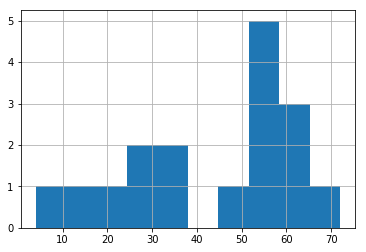

In [41]:
#Q2: Plot the distribution of a variable of your choice from the drug use datase
fig,ax = plt.subplots()
ax1 = drug_use['marijuana-frequency'].hist(bins=10)

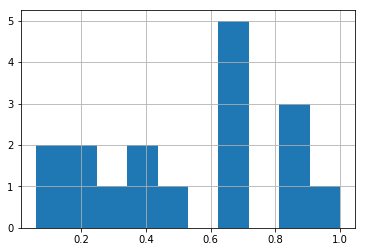

In [45]:
#Plot the same variable but percentile scored.
drug_use['Mari_Percentile_rank'] = drug_use['marijuana-frequency'].rank(pct=True)
drug_use['Mari_Percentile_rank'].hist(bins=10)

In [46]:
pd.concat([drug_use['marijuana-frequency'],drug_use['Mari_Percentile_rank']], axis = 1)

,marijuana-frequency,Mari_Percentile_rank
0,4.0,0.058824
1,15.0,0.117647
2,24.0,0.176471
3,25.0,0.235294
4,30.0,0.294118
5,36.0,0.382353
6,52.0,0.647059
7,60.0,0.882353
8,60.0,0.882353
9,52.0,0.647059


In [44]:
#Q4: Describe the effect, visually, of coverting raw scores to percentile.

#We see quite a similar picture of what the data is conveying, but now a distribution in terms of their relative ranking.  